# XBPM Data Analysis and Plot

In [2]:
# Auto Formatting
%load_ext lab_black

In [3]:
%matplotlib inline
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import cm
from numpy import random
from scipy import stats

## 1. Read XBPM Data and print data infomation

In [12]:
DF = pd.read_excel("./Data/08311hrXY.xlsx", names=["X", "Y"])

Data_X = DF["X"].to_numpy()
Data_Y = DF["Y"].to_numpy()

print("X Max: ", Data_X.max(), " nm")
print("X Min: ", Data_X.min(), " nm")
print("X Std: ", Data_X.std(), " nm")
print()
print("Y Max: ", Data_Y.max(), " nm")
print("Y Min: ", Data_Y.min(), " nm")
print("Y Std: ", Data_Y.std(), " nm")
print()

# 注意X,Y序列大小相同
print("X/Y Data length:")
print(len(Data_Y))
print(len(Data_X))

X Max:  20741  nm
X Min:  20316  nm
X Std:  78.86788300122885  nm

Y Max:  -3166  nm
Y Min:  -4984  nm
Y Std:  311.0541134496316  nm

X/Y Data length:
359
359


## 2. XBPM Scatter Plot with KDE analysis

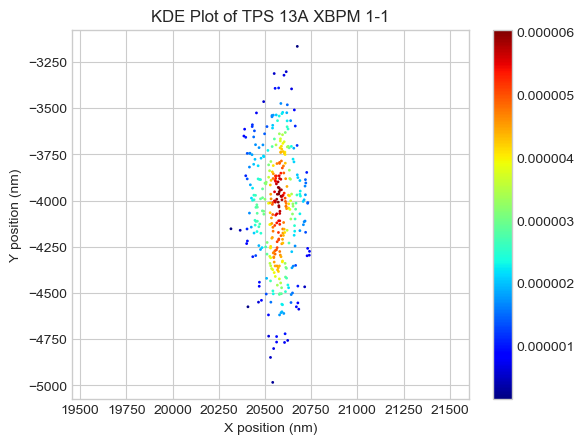

In [13]:
mpl.style.use("seaborn-whitegrid")
plt.axis("equal")
plt.figsize = (8, 8)

xy = np.vstack([Data_X, Data_Y])
xy = xy.astype(np.float)
z = stats.gaussian_kde(xy)(xy)

# plt.xlim(19500, 21500)
# plt.ylim(-3000, -5000)
plt.scatter(Data_X, Data_Y, c=z, s=4, edgecolor="", cmap="jet")
plt.colorbar()
plt.title("KDE Plot of TPS 13A XBPM 1-1")
plt.xlabel("X position (nm)")
plt.ylabel("Y position (nm)")
plt.savefig("KDE Plot of TPS 13A XBPM 1-1.png", dpi=300)

## 3. XBPM Series Plot

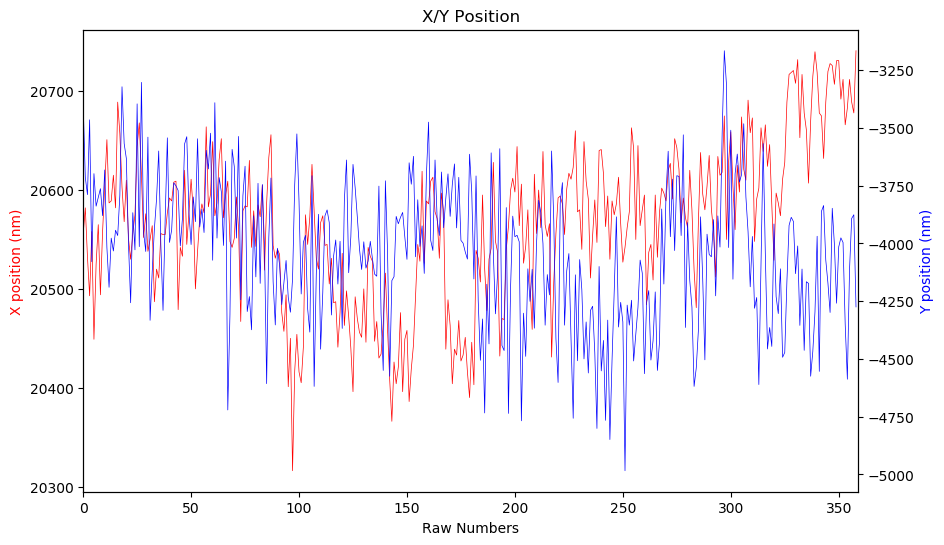

In [14]:
mpl.style.use("default")
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
plt.xlim(0, len(Data_X))

plt.title("X/Y Position")


ax1.plot(Data_X, "r-", linewidth=0.5)
ax2.plot(Data_Y, "b-", linewidth=0.5)

ax1.set_xlabel("Raw Numbers")
ax1.set_ylabel("X position (nm)", color="r")
ax2.set_ylabel("Y position (nm)", color="b")
plt.savefig("KDE Plot of TPS 13A XBPM 1-XY.png", dpi=300)

## 4. XBPM Box Plot

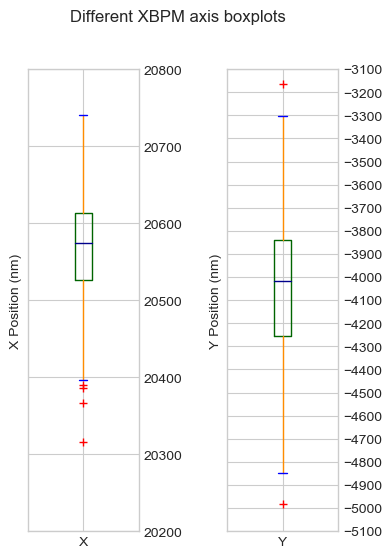

In [9]:
mpl.style.use("seaborn-whitegrid")
ig, axes = plt.subplots(1, 2, figsize=(4, 6))

# boxes表示箱體，whisker表示觸鬚線
# medians表示中位數，caps表示最大與最小值界限
color = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkBlue", caps="Blue")

# Box Plot
# sym引數表示異常值標記的方式
DF.plot(
    kind="box",
    ax=axes,
    subplots=True,
    title="Different XBPM axis boxplots",
    color=color,
    sym="r+",
)

# For Plot(Set plot limited & ticks)
pitch = 100
X_Max = math.floor((Data_X.max() + 100) / 100) * pitch
X_Min = math.floor((Data_X.min() - 100) / 100) * pitch
Y_Max = math.floor((Data_Y.max() + 100) / 100) * pitch
Y_Min = math.floor((Data_Y.min() - 100) / 100) * pitch

axes[0].set_ylabel("X Position (nm)")
axes[1].set_ylabel("Y Position (nm)")

axes[0].set_yticks(range(X_Min, X_Max + pitch, 100))
axes[1].set_yticks(range(Y_Min, Y_Max + pitch, 100))

axes[0].yaxis.set_ticks_position("right")
axes[1].yaxis.set_ticks_position("right")

axes[0].set_ylim(X_Min, X_Max)
axes[1].set_ylim(Y_Min, Y_Max)

plt.subplots_adjust(wspace=0.8, hspace=0.3)  # 調整子圖之間的間距
plt.savefig("box.png", dpi=300)  # 將繪製的圖片儲存為box.png